<a href="https://colab.research.google.com/github/SiriBatchu/CMPE-255-HW3/blob/main/Regression_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [2]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 57.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

In [4]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [6]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [7]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [8]:
# init setup on exp
exp.setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [9]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.1780
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.4650
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,1.3540
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.3740
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.5150
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.2130
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.1520
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,1.0160
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.1420
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0870


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [10]:
# compare models using OOP
# exp.compare_models()

In [11]:
best = create_model('catboost') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2711.9494,22985713.7501,4794.3418,0.8627,0.4871,0.3389
1,3003.3978,31155820.7166,5581.7399,0.8188,0.4392,0.2816
2,2817.7517,24028712.0822,4901.9090,0.6958,0.5431,0.4229
3,3028.1183,22863856.8784,4781.6166,0.8091,0.5230,0.4498
4,3221.4328,32713532.4851,5719.5745,0.7567,0.5508,0.3445
5,2840.7231,21518462.7443,4638.7997,0.8616,0.3847,0.2746
6,2576.7410,20071287.7437,4480.0991,0.8634,0.3637,0.2903
7,2837.7787,26688236.8750,5166.0659,0.8532,0.4436,0.2610
8,2726.6831,23373383.0335,4834.6027,0.8490,0.4714,0.3861


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

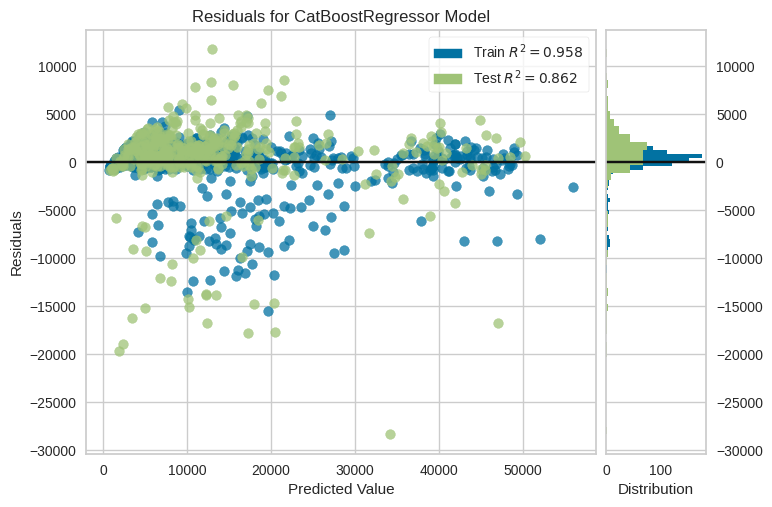

In [12]:
# plot residuals
plot_model(best, plot = 'residuals')

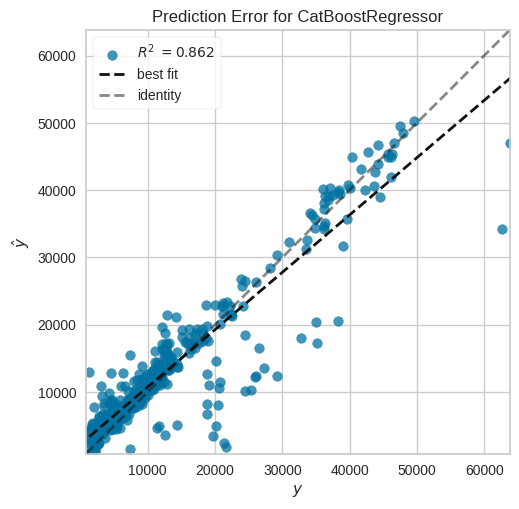

In [13]:
# plot error
plot_model(best, plot = 'error')

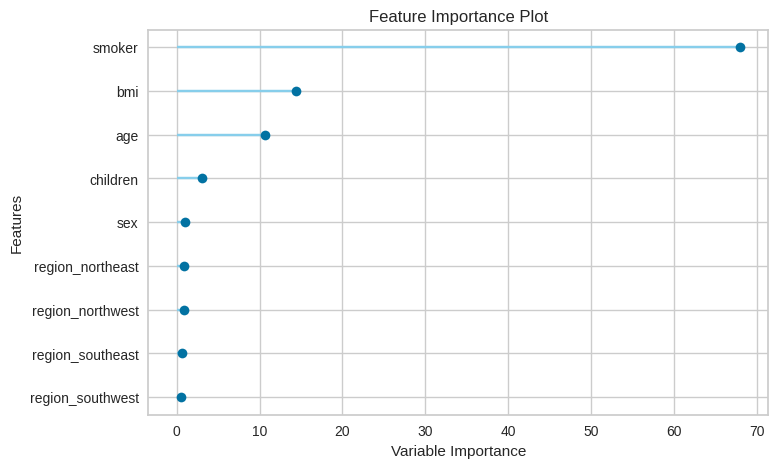

In [14]:
# plot feature importance
plot_model(best, plot = 'feature')

In [15]:
# check docstring to see available plots
# help(plot_model)

In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2578.8127,19697759.5002,4438.2158,0.8621,0.4471,0.3339


In [18]:
# show predictions df
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,11253.046845
319,32,male,37.334999,1,no,northeast,4667.607422,8206.080888
314,27,female,31.400000,0,yes,southwest,34838.871094,35771.425530
150,35,male,24.129999,1,no,northwest,5125.215820,5684.215504
336,60,male,25.740000,0,no,southeast,12142.578125,17075.773889


In [19]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('charges', axis=1, inplace=True)
new_data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [20]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,sex,bmi,children,smoker,region,prediction_label
0,19,female,27.900000,0,yes,southwest,18033.897942
1,18,male,33.770000,1,no,southeast,4411.959059
2,28,male,33.000000,3,no,southeast,5843.752357
3,33,male,22.705000,0,no,northwest,13490.837445
4,32,male,28.879999,0,no,northwest,3878.984820


In [21]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

In [22]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7c31082c75e0>)])